In [1]:
import numpy as np
import cv2
import os

In [2]:
path= "C:/Users/ashis/Downloads/myData"
lst=os.listdir(path)
print(lst)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# STORING IMAGE AND ITS CORRESPONDING CLASS IN A LIST

In [3]:
Class=[]
Image=[]
for i in range(0,len(lst)):
    no_of_img=os.listdir(path + "/" + lst[i])
    for j in range(0,len(no_of_img)):
        curr_img=cv2.imread(path + "/" + lst[i] + "/" + no_of_img[j])
        curr_img=cv2.resize(curr_img,(32,32))
        curr_img=cv2.cvtColor(curr_img,cv2.COLOR_BGR2GRAY)
        Class.append(lst[i])
        Image.append(curr_img)

In [4]:
len(Class)

10160

In [5]:
len(Image)

10160

# CHANGING LIST TO NUMPY ARRAY

In [6]:
Class=np.array(Class)
Image=np.array(Image)

# GETTING SHAPES OF THE NUMPY ARRAYS

In [7]:
print(Class.shape)
print(Image.shape)

(10160,)
(10160, 32, 32)


# CHECKING THE LISTS BY PUTTING RANDOM INDICES

0


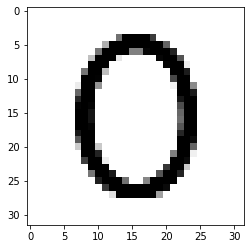

In [8]:
import matplotlib.pyplot as plt


plt.imshow(Image[1000],cmap="gray")
print(Class[1000])

4


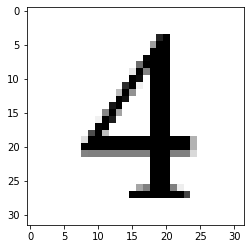

In [9]:
plt.imshow(Image[5000],cmap="gray")
print(Class[5000])

9


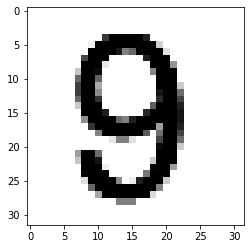

In [10]:
plt.imshow(Image[10000],cmap="gray")
print(Class[10000])

# CREATING TRAINING,VALIDATION AND TEST DATA

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(Image,Class,test_size=0.2)

In [13]:
print(len(X_train))
print(len(X_test))

8128
2032


In [14]:
X_train,X_vald,y_train,y_vald=train_test_split(Image,Class,test_size=0.2)

# GETTING NUMBER OF IMAGES OF EACH CLASS

This is important as to check that any class is not favoured 

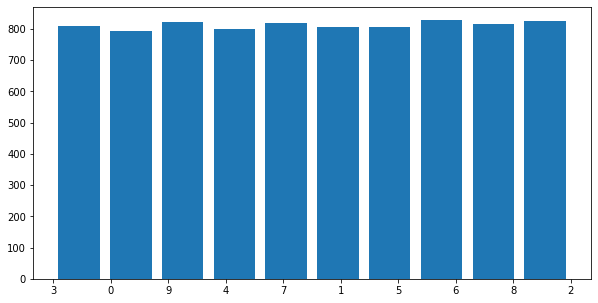

In [15]:
plt.figure(figsize=(10,5))
plt.hist(y_train,rwidth=0.8)
plt.show()

# PREPROCESSING THE DATA

In [16]:
print(X_train.shape,X_vald.shape,X_test.shape)

(8128, 32, 32) (2032, 32, 32) (2032, 32, 32)


A colour channel is also needed for training using CNN.Hence, data will be reshaped.

In [17]:
X_train=X_train.reshape(8128, 32, 32,1)
X_vald=X_vald.reshape(2032, 32, 32,1)
X_test=X_test.reshape(2032, 32, 32,1)

We also need to change the value of pixels in the range of 0 to 1

In [18]:
X_train=X_train/255.0
X_vald=X_vald/255.0
X_test=X_test/255.0

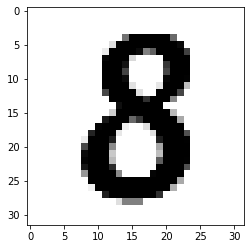

In [19]:
plt.imshow(X_train[2000],cmap="gray")

In [20]:
print(X_train.shape)

(8128, 32, 32, 1)


# ONE HOT ENCODING THE OUTPUT

The output is contained in the form of 0 to 9. This will create a problem in training our model. Hence we one hot encode the output.

In [21]:
from tensorflow.keras.utils import to_categorical

y_train=to_categorical(y_train,10)
y_vald=to_categorical(y_vald,10)
y_test=to_categorical(y_test,10)

c:\users\ashis\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\ashis\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\ashis\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

# DATA AUGMENTATION

Data augmentation trains our model with the variations of image that we currently have. This prevents overfitting of the model.
This is also helpful when we have less images.

In [22]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen=ImageDataGenerator(rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2)

# MAKING THE CONVOLUTION BASE
After many hit and trials, the following convolution base and classifier fitted best.

In [24]:
from tensorflow.keras import models

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,
                                  kernel_size=(5,5),activation="relu",input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.5))

# MAKING THE CLASSIFIER

In [25]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=150,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation="softmax"))

# STRUCTURE OF THE MODEL

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 150)               3

# COMPILING THE MODEL

In [27]:
 model.compile(loss="categorical_crossentropy",optimizer="adam"
                  ,metrics=["accuracy"])


# TRAINING THE MODEL

In [28]:
history=model.fit(train_datagen.flow(X_train,y_train,batch_size=50),
                  steps_per_epoch=120,epochs=25,validation_data=(X_vald,y_vald),shuffle=1)

Epoch 1/25
120/120 [==============================] - 15s 114ms/step - loss: 2.2258 - accuracy: 0.1642 - val_loss: 0.7095 - val_accuracy: 0.8740
Epoch 2/25
120/120 [==============================] - 12s 102ms/step - loss: 1.3247 - accuracy: 0.5484 - val_loss: 0.2466 - val_accuracy: 0.9291
Epoch 3/25
120/120 [==============================] - 12s 103ms/step - loss: 0.8610 - accuracy: 0.7148 - val_loss: 0.1749 - val_accuracy: 0.9498
Epoch 4/25
120/120 [==============================] - 13s 108ms/step - loss: 0.6468 - accuracy: 0.7941 - val_loss: 0.1207 - val_accuracy: 0.9660
Epoch 5/25
120/120 [==============================] - 15s 121ms/step - loss: 0.5204 - accuracy: 0.8419 - val_loss: 0.1209 - val_accuracy: 0.9646
Epoch 6/25
120/120 [==============================] - 9s 77ms/step - loss: 0.4843 - accuracy: 0.8489 - val_loss: 0.0974 - val_accuracy: 0.9729
Epoch 7/25
120/120 [==============================] - 12s 99ms/step - loss: 0.3946 - accuracy: 0.8753 - val_loss: 0.0988 - val_accur

# PLOTTING THE RESULT

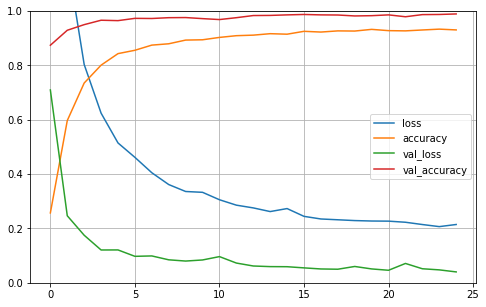

In [29]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The gap between training and validation accuracy is a clear indication of overfitting. The larger the gap, the higher the overfitting. Here the gap is less hence model is acceptable.

# TESTING THE MODEL

In [30]:
score=model.evaluate(X_test,y_test,verbose=0)

In [31]:
print("Accuracy=",score[1])

Accuracy= 0.9886810779571533


The accuracy of the model is 98.87% which is quite good!!!!

# SAVING THE MODEL

In [32]:
model.save("D:\CNN\model.h5")